In [46]:
# installing packages
# !pip install scikit-learn
# !pip install statsmodels
# !pip install econml
!pip install dowhy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 17.8 MB/s eta 0:00:00


In [37]:
!pip install -U DoubleML

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.6/274.6 kB 7.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd

In [3]:
# Load the datasets
complaints_allegation = pd.read_csv('complaints-allegation.csv')
officers = pd.read_csv('final-profiles.csv')
salary = pd.read_csv('salary_2002-2017_2017-09.csv')
salary_ranks = pd.read_csv('salary-ranks_2002-2017_2017-09.csv')

# Merge the DataFrames on the UID columns
# The 'left_on' corresponds to the column in complaints-accused, and 'right_on' is the column in final-profiles.
# merged_data = pd.merge(complaints, officers, left_on='link_UID', right_on='link_UID', how='left')

# Print the first few rows of the merged data to verify the merge
# print(merged_data.head())

# Optionally, save the merged data to a new CSV file for further analysis or reporting
# merged_data.to_csv('merged_complaints_officers.csv', index=False)



<ipython-input-3-aa1ab628fd97>:2: DtypeWarning: Columns (16,18,22) have mixed types. Specify dtype option on import or set low_memory=False.
  complaints_allegation = pd.read_csv('complaints-allegation.csv')
<ipython-input-3-aa1ab628fd97>:3: DtypeWarning: Columns (4,15) have mixed types. Specify dtype option on import or set low_memory=False.
  officers = pd.read_csv('final-profiles.csv')


In [ ]:
salary_ranks.columns

Index(['UID', 'pay_grade', 'rank', 'salary', 'year', 'spp_date',
       'cleaned_rank', 'link_UID'],
      dtype='object')

In [ ]:
complaints_allegation.columns

Index(['row_id', 'complaints-accused_2000-2018_2018-03_ID', 'cr_id',
       'accusation_id', 'allegation_category', 'allegation_category_code',
       'current_investigator_category', 'current_investigator_category_code',
       'unit', 'unit_detail', 'accused_arrested', 'duty_status', 'injured',
       'final_finding', 'finding_narrative', 'penalty_id', 'penalty_code',
       'number_of_days', 'final_finding_narrative', 'star', 'rank',
       'final_finding_USE', 'final_outcome_USE', 'merge', 'UID', 'link_UID'],
      dtype='object')

In [4]:

merged_data_1 = pd.merge(salary_ranks, complaints_allegation, left_on='link_UID', right_on='link_UID', how='left')

merged_data = pd.merge(merged_data_1, officers, left_on='link_UID', right_on='link_UID', how='left')

In [5]:
merged_data.head(3)

,UID_x,pay_grade,rank_x,salary,year,spp_date,cleaned_rank_x,link_UID,row_id,complaints-accused_2000-2018_2018-03_ID,...,appointed_date,resignation_date,current_status,current_star,current_unit,current_rank,start_date,org_hire_date,profile_count,cleaned_rank_y
0,100011.0,E|3,SERGEANT,101442.0,2016.0,2016-02-01,SERGEANT,3978.0,64070.0,8113.0,...,2004-11-29,NaN,1.0,1140.0,8.0,SERGEANT OF POLICE,2004-11-29,2004-11-29,13,SERGEANT
1,100011.0,E|3,SERGEANT,101442.0,2016.0,2016-02-01,SERGEANT,3978.0,64203.0,8113.0,...,2004-11-29,NaN,1.0,1140.0,8.0,SERGEANT OF POLICE,2004-11-29,2004-11-29,13,SERGEANT
2,100011.0,E|3,SERGEANT,101442.0,2016.0,2016-02-01,SERGEANT,3978.0,64204.0,8113.0,...,2004-11-29,NaN,1.0,1140.0,8.0,SERGEANT OF POLICE,2004-11-29,2004-11-29,13,SERGEANT


In [ ]:
merged_data.columns

Index(['UID_x', 'pay_grade', 'rank_x', 'salary', 'year', 'spp_date',
       'cleaned_rank_x', 'link_UID', 'row_id',
       'complaints-accused_2000-2018_2018-03_ID', 'cr_id', 'accusation_id',
       'allegation_category', 'allegation_category_code',
       'current_investigator_category', 'current_investigator_category_code',
       'unit', 'unit_detail', 'accused_arrested', 'duty_status', 'injured',
       'final_finding', 'finding_narrative', 'penalty_id', 'penalty_code',
       'number_of_days', 'final_finding_narrative', 'star', 'rank_y',
       'final_finding_USE', 'final_outcome_USE', 'merge', 'UID_y', 'UID',
       'first_name', 'last_name', 'middle_initial', 'middle_initial2',
       'suffix_name', 'birth_year', 'race', 'gender', 'appointed_date',
       'resignation_date', 'current_status', 'current_star', 'current_unit',
       'current_rank', 'start_date', 'org_hire_date', 'profile_count',
       'cleaned_rank_y'],
      dtype='object')

In [6]:
selected_columns = merged_data[['link_UID', 'race','gender','birth_year','salary', 'appointed_date', 'cleaned_rank_x','allegation_category','final_finding','penalty_code','number_of_days']]
selected_columns.sample(n=10)

,link_UID,race,gender,birth_year,salary,appointed_date,cleaned_rank_x,allegation_category,final_finding,penalty_code,number_of_days
269453,9951.0,WHITE,FEMALE,1957.0,85662.0,1996-11-04,POLICE OFFICER,ILLEGAL ARREST / FALSE ARREST,NOT SUSTAINED,NaN,NaN
675899,25307.0,HISPANIC,MALE,1975.0,54672.0,1998-07-27,POLICE OFFICER,CLOSED HAND STRIKE (PUNCH),NOT SUSTAINED,NaN,NaN
709851,25602.0,WHITE,MALE,1983.0,61932.0,2006-05-01,POLICE OFFICER,MISCELLANEOUS,NOT SUSTAINED,REPRIMAND,NaN
401434,19714.0,BLACK,MALE,1969.0,83220.0,2009-03-09,POLICE OFFICER,MISCELLANEOUS,NOT SUSTAINED,NaN,NaN
836961,15465.0,WHITE,MALE,1964.0,90348.0,1986-06-16,SERGEANT,DOMESTIC ALTERCATION - PHYSICAL ABUSE,SUSTAINED,SUSPENSION,30.0
231685,789.0,HISPANIC,FEMALE,1982.0,73296.0,2012-07-02,POLICE OFFICER,HANDCUFF TOO TIGHT,UNFOUNDED,NaN,NaN
742406,15531.0,WHITE,MALE,1971.0,75372.0,2004-04-26,POLICE OFFICER,MISCELLANEOUS,NOT SUSTAINED,NaN,NaN
307419,9207.0,WHITE,MALE,1963.0,60600.0,1991-12-16,POLICE OFFICER,SEARCH - PERSON / PROPERTY,SUSTAINED,SUSPENSION,5.0
1064440,31512.0,ASIAN/PACIFIC ISLANDER,MALE,1966.0,86520.0,1997-08-04,POLICE OFFICER,EXCESSIVE FORCE / ON DUTY - INJURY,UNFOUNDED,NaN,NaN
469642,579.0,BLACK,MALE,1964.0,81252.0,1988-05-02,POLICE OFFICER,UNNECESSARY DISPLAY OF WEAPON / ON DUTY,UNFOUNDED,NaN,NaN


### Backdoor

In [8]:
selected_columns[selected_columns['final_finding'] == 'SUSTAINED'].penalty_code.value_counts()

penalty_code
SUSPENSION         182798
SEPARATION          24894
REPRIMAND           17043
VIOLATION NOTED     10766
Name: count, dtype: int64

In [9]:
sustained_rows = selected_columns[selected_columns['final_finding'] == 'SUSTAINED']
sustained_rows

,link_UID,race,gender,birth_year,salary,appointed_date,cleaned_rank_x,allegation_category,final_finding,penalty_code,number_of_days
42,24345.0,HISPANIC,MALE,1967.0,90540.0,1992-12-07,DETECTIVE,USE OF PROFANITY,SUSTAINED,REPRIMAND,NaN
43,24345.0,HISPANIC,MALE,1967.0,90540.0,1992-12-07,DETECTIVE,USE OF PROFANITY,SUSTAINED,REPRIMAND,NaN
44,24345.0,HISPANIC,MALE,1967.0,90540.0,1992-12-07,DETECTIVE,CONDUCT UNBECOMING,SUSTAINED,REPRIMAND,NaN
45,24345.0,HISPANIC,MALE,1967.0,90540.0,1992-12-07,DETECTIVE,USE OF PROFANITY,SUSTAINED,REPRIMAND,NaN
46,24345.0,HISPANIC,MALE,1967.0,90540.0,1992-12-07,DETECTIVE,NEGLECT OF DUTY,SUSTAINED,REPRIMAND,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1208698,32465.0,BLACK,FEMALE,1968.0,75372.0,1999-11-29,POLICE OFFICER,CLOSED HAND STRIKE (PUNCH),SUSTAINED,SEPARATION,NaN
1208699,32465.0,BLACK,FEMALE,1968.0,75372.0,1999-11-29,POLICE OFFICER,"ASSAULT / BATTERY, ETC.",SUSTAINED,SEPARATION,NaN
1208700,32465.0,BLACK,FEMALE,1968.0,75372.0,1999-11-29,POLICE OFFICER,INSUBORDINATION,SUSTAINED,SEPARATION,NaN
1208701,32465.0,BLACK,FEMALE,1968.0,75372.0,1999-11-29,POLICE OFFICER,USE OF PROFANITY,SUSTAINED,SEPARATION,NaN


In [10]:
model_df = sustained_rows[['penalty_code','gender','race','allegation_category', 'cleaned_rank_x',]]

In [11]:
model_df.head(3)

,penalty_code,gender,race,allegation_category,cleaned_rank_x
42,REPRIMAND,MALE,HISPANIC,USE OF PROFANITY,DETECTIVE
43,REPRIMAND,MALE,HISPANIC,USE OF PROFANITY,DETECTIVE
44,REPRIMAND,MALE,HISPANIC,CONDUCT UNBECOMING,DETECTIVE


In [12]:
model_df.penalty_code.value_counts()

penalty_code
SUSPENSION         182798
SEPARATION          24894
REPRIMAND           17043
VIOLATION NOTED     10766
Name: count, dtype: int64

In [13]:
model_df['penalized'] = model_df['penalty_code'].apply(lambda x: 1 if x in ['SUSPENSION', 'SEPARATION'] else 0)

<ipython-input-13-4d1e7d261f8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['penalized'] = model_df['penalty_code'].apply(lambda x: 1 if x in ['SUSPENSION', 'SEPARATION'] else 0)


In [14]:
model_df['white'] = model_df['race'].apply(lambda x: 1 if x == 'WHITE' else 0)

<ipython-input-14-0afcff4228ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['white'] = model_df['race'].apply(lambda x: 1 if x == 'WHITE' else 0)


In [15]:
model_df['male'] = model_df['gender'].apply(lambda x: 1 if x == 'MALE' else 0)

<ipython-input-15-307361f5afdf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['male'] = model_df['gender'].apply(lambda x: 1 if x == 'MALE' else 0)


In [16]:
rank_order = {
    'CIVILIAN': 1,
    'POLICE OFFICER': 2,
    'FIELD TRAINING OFFICER': 3,
    'INVESTIGATOR': 4,
    'DETECTIVE': 5,
    'SERGEANT': 6,
    'LIEUTENANT': 7,
    'CAPTAIN': 8,
    'COMMANDER': 9,
    'DEPUTY CHIEF': 10
}

In [17]:
model_df['rank'] = model_df['cleaned_rank_x'].map(rank_order)

<ipython-input-17-59e5b6679683>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['rank'] = model_df['cleaned_rank_x'].map(rank_order)


In [18]:
model_df['penalty_code'].value_counts(dropna = False)

penalty_code
SUSPENSION         182798
SEPARATION          24894
REPRIMAND           17043
NaN                 13085
VIOLATION NOTED     10766
Name: count, dtype: int64

In [23]:
model_df['rank'].value_counts()

rank
2     206837
6      22464
5      13559
3       3071
7       1701
9        526
4        311
10       100
8         13
1          4
Name: count, dtype: int64

In [28]:
rank_10 = model_df[model_df['rank']==4]

rank_10['penalized'].value_counts()

penalized
1    261
0     50
Name: count, dtype: int64

In [29]:
import statsmodels.formula.api as smf

formula = 'penalized ~  white + male'

models = []

results = []

for rank in range(1,11):
    if rank in [1,8,10]:
        continue

    print(rank)

    curr_slice = model_df[model_df['rank'] == rank]
    curr_model = smf.logit(formula, curr_slice).fit()

    pred = curr_model.predict(model_df)

    results.append(pred.mean())

2
Optimization terminated successfully.
         Current function value: 0.428133
         Iterations 6
3
Optimization terminated successfully.
         Current function value: 0.372838
         Iterations 7
4
         Current function value: 0.320983
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5
Optimization terminated successfully.
         Current function value: 0.454924
         Iterations 7
6
Optimization terminated successfully.
         Current function value: 0.520525
         Iterations 5
7
Optimization terminated successfully.
         Current function value: 0.638757
         Iterations 5
9
         Current function value: 0.663233
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
rank_order = {
    'CIVILIAN': 1,
    'POLICE OFFICER': 2,
    'FIELD TRAINING OFFICER': 3,
    'INVESTIGATOR': 4,
    'DETECTIVE': 5,
    'SERGEANT': 6,
    'LIEUTENANT': 7,
    'CAPTAIN': 8,
    'COMMANDER': 9,
    'DEPUTY CHIEF': 10
}

In [ ]:
results #estimates for 2 3 4 5 6 7 9

[0.8443392498171455,
 0.7634607074377942,
 0.7815613152231834,
 0.8002450849382325,
 0.7722310623861913,
 0.6627234392711808,
 0.4843809829367687]

### Implementing DoubleML estimator

In [48]:
#import doubleml
import math
import numpy as np
import pandas as pd
import statsmodels.api as sm

from econml.dml import LinearDML

from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import NMF
from sklearn.exceptions import ConvergenceWarning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split

from tqdm.notebook import tqdm

from warnings import simplefilter
simplefilter("ignore", category=ConvergenceWarning)

# import for dowhy
from dowhy import CausalModel

In [54]:
model_df['rank_high'] = np.where(model_df['rank'] >= 6, 1, 0)
model_df.columns


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Index(['penalty_code', 'gender', 'race', 'allegation_category',
       'cleaned_rank_x', 'penalized', 'white', 'male', 'rank', 'rank_high'],
      dtype='object')

In [63]:
# convert allegation_category to binary violent vs nonviolent
# outcome_counts.head(10)
category_mapping = {
    'MISCELLANEOUS': 'Non-Violent',
    'DOMESTIC ALTERCATION - PHYSICAL ABUSE': 'Violent',
    'NEGLECT OF DUTY': 'Non-Violent',
    'EXCESSIVE FORCE - USE OF FIREARM / OFF DUTY - INJURY': 'Violent',
    'UNNECESSARY DISPLAY OF WEAPON / ON DUTY': 'Non-Violent',
    'USE OF PROFANITY': 'Non-Violent',
    'EXCESSIVE FORCE / OFF DUTY - NO INJURY': 'Violent',
    'EXCESSIVE FORCE / On DUTY - INJURY': 'Violent',
    'CONDUCT UNBECOMING': 'Non-Violent',
    'NO INJURY': "Non-Violent",
    'PUSH/PULL/GRAB': "Violent",
    'INJURY': "Violent",
    'FALSE': "Non-Violent",
    'FAIL TO SUBMIT': "Non-Violent",
    'INADEQUATE / FAILURE TO PROVIDE SERVICE': "Non-Violent",
    'HARASSMENT': "Non-Violent",
    'EXCESSIVE FORCE - USE OF FIREARM / OFF DUTY - NO INJURY': "Violent",
    'VERBAL ABUSE': "Non-Violent",
    'FAIL TO OBTAIN A COMPLAINT REGISTER NUMBER': "Non-Violent",
    'LEAVING ASSIGNMENT (DISTRICT, BEAT, SECTOR, COURT)': "Non-Violent",
    'INTOXICATED OFF DUTY': "Non-Violent",
    'CLOSED HAND STRIKE (PUNCH)': "Violent",
}
# sustained_df['violence_classification'] = sustained_df['allegation_category'].map(category_mapping).fillna('Non-Violent')
model_df.loc[:, 'violence_classification'] = model_df['allegation_category'].map(category_mapping).fillna('Non-Violent')
model_df['violence_binary'] = np.where(model_df['violence_classification'] == 'Violent', 1, 0)
model_df.head()

,penalty_code,gender,race,allegation_category,cleaned_rank_x,penalized,white,male,rank,rank_high,violence_classification,violence_binary
42,REPRIMAND,MALE,HISPANIC,USE OF PROFANITY,DETECTIVE,0,0,1,5,0,Non-Violent,0
43,REPRIMAND,MALE,HISPANIC,USE OF PROFANITY,DETECTIVE,0,0,1,5,0,Non-Violent,0
44,REPRIMAND,MALE,HISPANIC,CONDUCT UNBECOMING,DETECTIVE,0,0,1,5,0,Non-Violent,0
45,REPRIMAND,MALE,HISPANIC,USE OF PROFANITY,DETECTIVE,0,0,1,5,0,Non-Violent,0
46,REPRIMAND,MALE,HISPANIC,NEGLECT OF DUTY,DETECTIVE,0,0,1,5,0,Non-Violent,0


In [64]:
Y = model_df['penalized'].values
T = model_df['rank_high'].values # converting rank to binary treatment
confounders = model_df[['white', 'male', 'violence_binary']]

# confounders = pd.get_dummies(confounders, columns=['allegation_category'], drop_first=True)

X = confounders.values

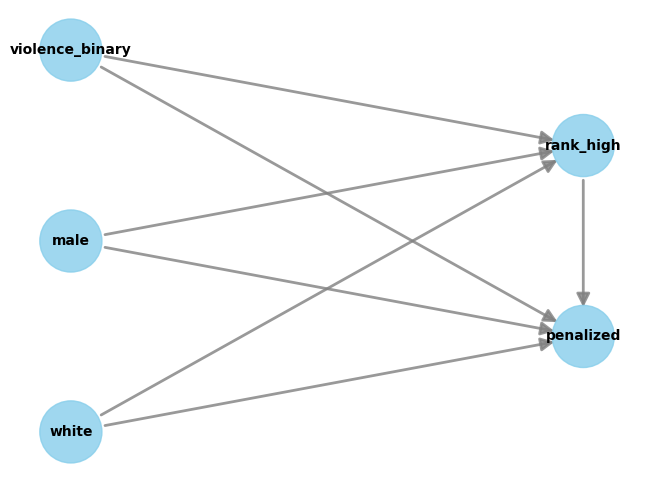

Identified Estimand: 
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                               
────────────(E[penalized|white,male,violence_binary])
d[rank_high]                                         
Estimand assumption 1, Unconfoundedness: If U→{rank_high} and U→penalized then P(penalized|rank_high,white,male,violence_binary,U) = P(penalized|rank_high,white,male,violence_binary)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [65]:
# model is a mess with the allegation category being binary
model = CausalModel(
    data=model_df,
    treatment='rank_high',
    outcome='penalized',
    common_causes=confounders.columns.tolist()
)

# visualized model
model.view_model()

# figure out which variables should be used
identified_estimand = model.identify_effect()
print("Identified Estimand: ")
print(identified_estimand)

In [69]:
# gpt code:
# # Specify and fit the LinearDML model
# model_y = LassoCV(cv=3)  # Outcome model
# model_t = LogisticRegressionCV(cv=3, solver='liblinear')  # Treatment model

# # Initialize the LinearDML model
# dml = LinearDML(model_y=model_y, model_t=model_t, discrete_treatment=True, cv=3)

# zach ex code:
# dml = LinearDML(model_y=LassoCV(cv=2, n_alphas=1, verbose=0, n_jobs=-1),
#                      model_t=LassoCV(cv=2, n_alphas=1, verbose=0, n_jobs=-1),
#                      linear_first_stages=True, n_splits=2)

# did n_splits --> cv?
# !! swap to randomforest
dml = LinearDML(model_y=LassoCV(cv=2, n_alphas=1, verbose=0, n_jobs=-1),
                model_t=LassoCV(cv=2, n_alphas=1, verbose=0, n_jobs=-1),
                linear_first_stages=True, cv=2)

dml.fit(Y=Y, T=T, X=X, inference="statsmodels")

treatment_effects = dml.effect(X) # individual treatment effects for each x?
ci = dml.effect_interval(X)

Model LassoCV(cv=2, n_alphas=1, n_jobs=-1, verbose=0) has a non-default cv attribute, which will be ignored
Model LassoCV(cv=2, n_alphas=1, n_jobs=-1, verbose=0) has a non-default cv attribute, which will be ignored


NameError: name 'te' is not defined

In [71]:
print(f"Estimated Treatment Effect: {treatment_effects.mean()}") # prob for each row of the data, this model given outcome = predict counterfactual outcome given these treatments
print(f"95% Confidence Interval: {ci}")

# hard to find individual treatment effects (generally not identified)
# ste for 95% ci, more doc for difference

Estimated Treatment Effect: -0.0815846504381785
95% Confidence Interval: (array([-0.12918153, -0.12918153, -0.12918153, ..., -0.19043007,
       -0.19043007, -0.19043007]), array([-0.1104611 , -0.1104611 , -0.1104611 , ..., -0.14616307,
       -0.14616307, -0.14616307]))


In [75]:
# wait im not ab to rerun that attempt so new code

# this is assuming a constant marginal effect? but only two so...
# but why am i making assumptions here
te_pred = dml.const_marginal_effect(X).ravel()

lb_mult, ub_mult = dml.const_marginal_effect_interval(X, alpha=0.05)
lb_mult, ub_mult = lb_mult.ravel(), ub_mult.ravel()

NameError: name 'te_pred_mult' is not defined

In [76]:
print("Treatment Effect, 95% CI" + "\t\t" + "{:.6f}".format(te_pred[0]) +\
      "({:.6f}".format(lb_mult[0]) + ", " + "{:.6f})".format(ub_mult[0]))

Treatment Effect, 95% CI		-0.119821(-0.129182, -0.110461)
